# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

### Daniel Fylling

## Abstract

This project largely revolves around exploring gray-scale histograms of images. The project includes a practical exercise on histogram stretching, which aims to enhance the contrast of grayscale images. In this part it is learned that linear stretching can help improve image features, but has limited use.

The main focus of the project is on histogram equalization. We perform histogram equalization for grayscale images and understanding its impact on the image's histogram and cumulative distribution function (CDF). Multiple grayscale images are used to illustrate the process and its effects. Here it is learned that this technique can help improve image clarity at the cost of realism.

The project concludes with a discussion on noise reduction for a series of digital images. Through mathematical derivations it is seen that an estimated clean image can be produced by averaging multiple noisy ones, as long as the noise has a mean value of zero. It is also showed that the variance of said estimation will decrease linearly with increasing size of the series of images.

## Problem 1

The histogram for an image of a **black** cilinder and **white** background is $[5600,980,10,0,0,40,11200,80000]$, where 8 gray levels are used. 

The radius of the cilinder is $r = 85\text{mm}$ and the height is $h = 310\text{mm}$. The cilinder is perfectly oriented to only see the lateral area, but not the top or bottom of the cilinder. 

Use this information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

Here we are looking to find the resolution of the image in mm/pixel. 
1. We approximate the shape of the cylinder into a rectangle with height = h = 310mm and width = 2*r = 170 mm. (Here the effect of perspective is neglected.)
2. This gives a total visible area of the cylinder is 52700 mm^2.
3. We assume that the gray level array starts with black at the left side and light intensity increases to perfect white at the right side.
4. By counting the 3 first bins in the histogram as part of the cylinder we get a total of 6590 pixels.
5. From this we can calculate that each pixel contains 52700/6590 = 8 mm^2

$\Delta x = \Delta y = \sqrt{8} mm$

In [182]:
52700/6590

7.996965098634294

In [6]:
import numpy as np
c_ = np.array([3,8,10,10,10,11,14,16])*1/16

l_ = np.round(c_*7)
l_

array([1., 4., 4., 4., 4., 5., 6., 7.])


## Problem 2

For images, such as `./images/christmas.png`, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=255). Show and explain the result using `./images/christmas.png` as an example. 



In [183]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [184]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    img_new =( img - np.min(img)) / (np.max(img) - np.min(img)) * 254 + 0.5
    
    return img_new

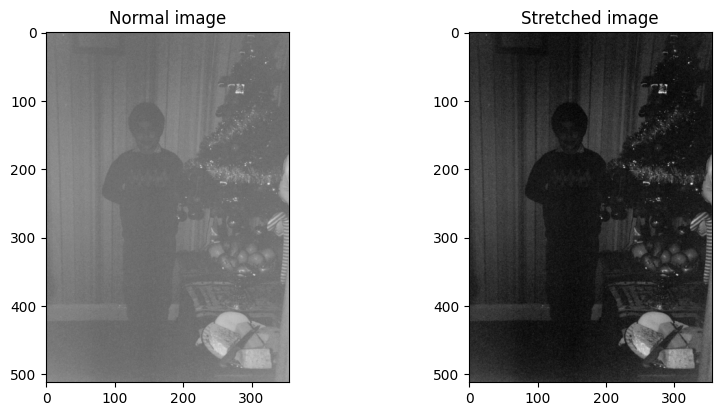

In [185]:
# Read the image
img_path = "./images/christmas.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Normal image')
plt.subplot(222)
plt.imshow(img_stretch, cmap='gray', vmin=0, vmax=255)
plt.title('Stretched image')
plt.show()


We notice that this simple linear stretching helped bring some clarity to the image, but the bulk of the pixels are still clumped together in the lower / darker region.


## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

**a)** Use Python and find the histograms for the images. Plot the normalized cumulative distribution function (CDF) over the histogram.


In [186]:
img_path = "./images/pout.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

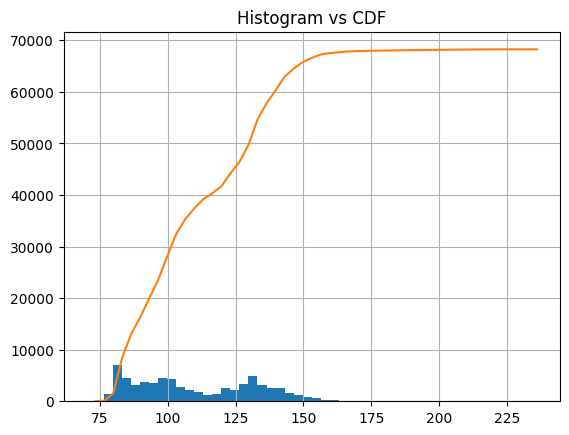

In [187]:

# Find and plot image histogram
plt.hist(img.flatten() , bins = 50 )

# Find cummulative sum of histogram
img_freq, bin_edges = np.histogram(img , bins = 50 )
img_cdf = np.cumsum(img_freq)

# Plot cumsum
plt.plot(bin_edges[1:] , img_cdf)
plt.grid()
plt.title('Histogram vs CDF')
plt.show()

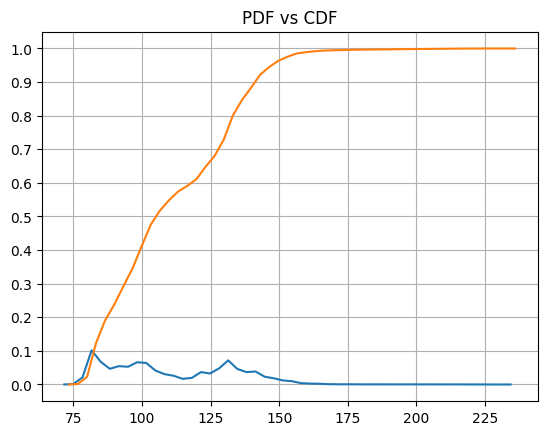

In [188]:

# Find normalized PDF and CDF
n = np.size(img)
img_relfreq = img_freq/n
img_cdf = np.cumsum(img_relfreq)

# Calculate bin midpoints for plotting PDF
bin_mps = (bin_edges[0:-1] + bin_edges[1:])*0.5

# Plot normalized PDF and CDF graphs
plt.plot(bin_mps , img_relfreq)
plt.plot(bin_edges[1:] , img_cdf)
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.grid()
plt.title('PDF vs CDF')
plt.show()


**b)** Perform histogram equalization of these images and find the new histograms.  Plot the normalized CDF over the new histogram. Discuss the effect of the equalization over the histogram and its CDF.


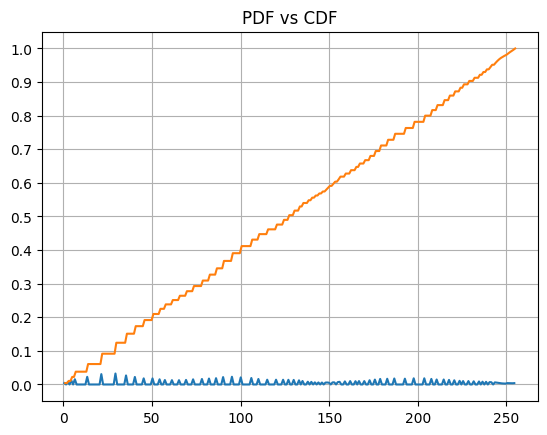

In [189]:
# Equalized image is found by interpolating each value in original
# image onto its own CDF, then scale the percentile value to 255.
equalized_img = np.interp(img, bin_edges, np.r_[0, img_cdf])*255

# Perform same process as for original image to display PDF and CDF
equalized_img_freq, bin_edges = np.histogram(equalized_img , bins = 256 )

# Find normalized PDF and CDF
n = np.size(equalized_img)
equalized_img_relfreq = equalized_img_freq/n
equalized_img_cdf = np.cumsum(equalized_img_relfreq)

# Calculate bin midpoints for plotting PDF
bin_mps = (bin_edges[0:-1] + bin_edges[1:])*0.5

# Plot normalized PDF and CDF graphs
plt.plot(bin_mps , equalized_img_relfreq)
plt.plot(bin_edges[1:] , equalized_img_cdf)
plt.yticks(np.arange(0 , 1.1 , 0.1))
plt.grid()
plt.title('PDF vs CDF')
plt.show()

**Discuss the effect of the equalization over the histogram and its CDF.**

The effect of the equalization on the histogram / PDF, and the CDF is that the new equalized PDF has been flattened and the CDF is approximately a straight line. This indicates that the available spectrum of shades of gray has been utilized more evenly for the equalized image.

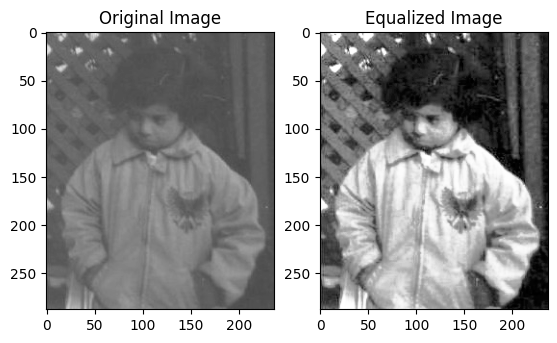

In [190]:
# Plotting original vs equalized image for comparison
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.subplot(232)
plt.imshow(equalized_img, cmap='gray', vmin=0, vmax=255)
plt.title('Equalized Image')
plt.show()

Here the effect on the image itself can be observed. The equalized image suffers that it looks less natural, but at the same timeit looks clearer and it is more easy to discern certain details. 

To be able to more easily repeat the above process for the other images, a class is made. The default setting for number of bins is set to 256 since we know that the input is in 8-bit formatting.

In [191]:
# Wrapped above functionalities into a class
class img_equalizer:
    """
    Takes a gray-scal image as input and calculates histogram distribution of gray levels.
    Calculates cdf and other relevant values for plotting.
    """

    def __init__(self, img, bins = 256):

        self.img = img
        self.bins = bins
        self.n = np.size(img)

        # Define bin edges, bin midpoints and relative frequancies
        self.img_freq, self.bin_edges = \
            np.histogram(self.img , bins = self.bins)
        self.bin_mps = (self.bin_edges[0:-1] + self.bin_edges[1:])*0.5
        self.img_relfreq = self.img_freq/self.n

        # Define CDF
        self.img_cdf = np.cumsum(self.img_relfreq)

        # Equalized image is found by interpolating each value in input-
        # image onto its own CDF, then scale the percentile value to 255.
        self.equalized_img = np.interp(self.img, self.bin_edges,\
                                        np.r_[0, self.img_cdf])*255

    def plot_pdf_cdf(self):
        "Plots PDF and CDF distributions of input image"

        plt.plot(self.bin_mps , self.img_relfreq, label = 'PDF')
        plt.plot(self.bin_edges[1:] , self.img_cdf, label = 'CDF')
        plt.title('PDF and CDF')
        plt.legend()
        plt.yticks(np.arange(0 , 1.1 , 0.1))
        plt.grid()

    def plot_image(self):
        "Plots input image"

        plt.imshow(self.img, cmap='gray', vmin=0, vmax=255)

    

The above process is repeated for remaining images.

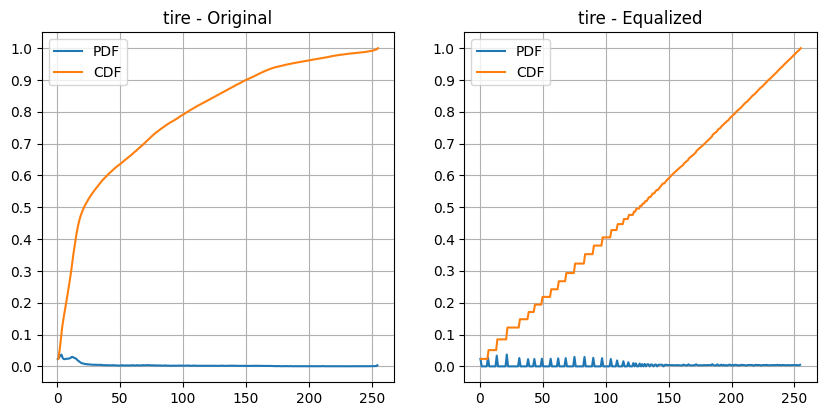

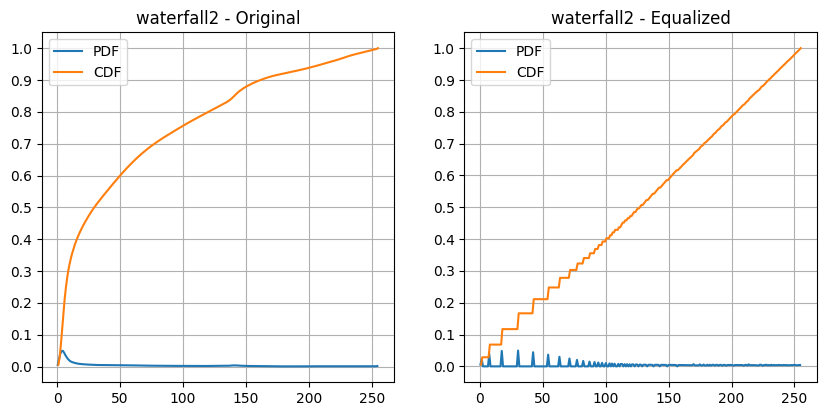

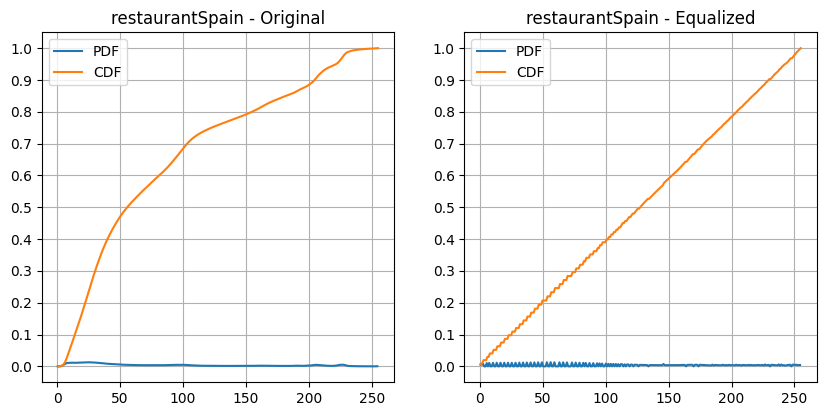

In [192]:
img_names = ('tire', 'waterfall2' , 'restaurantSpain')

for i, img_name in enumerate(img_names):
    img_path = f"./images/{img_name}.jpg"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    img_equalizer(img).plot_pdf_cdf()
    plt.title(f'{img_name} - Original')
    plt.subplot(222)
    img_equalizer(img_equalizer(img).equalized_img).plot_pdf_cdf()
    plt.title(f'{img_name} - Equalized')
    plt.show()

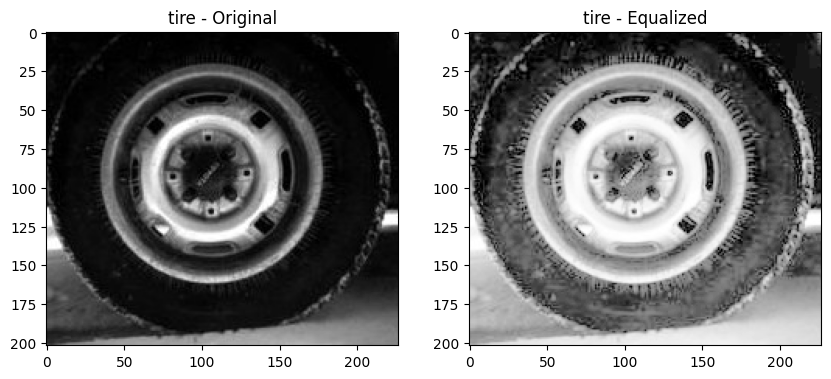

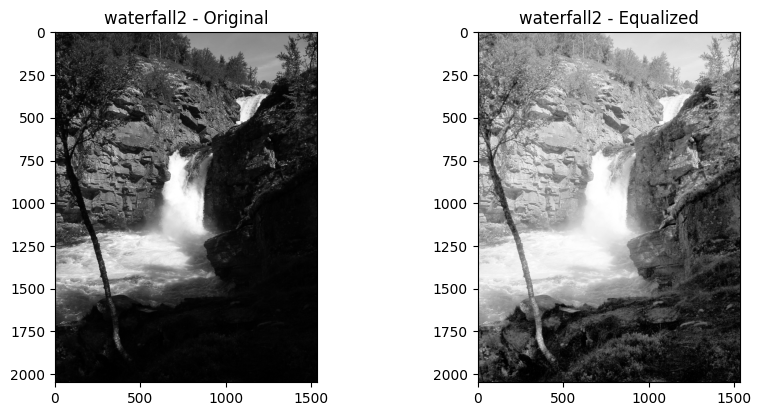

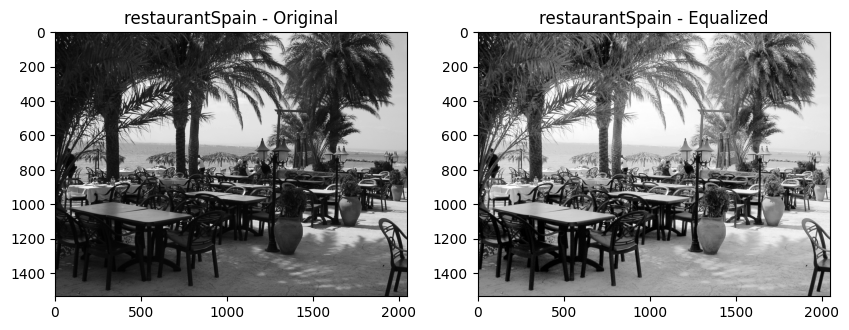

In [193]:
img_names = ('tire', 'waterfall2' , 'restaurantSpain')


for i, img_name in enumerate(img_names):
    img_path = f"./images/{img_name}.jpg"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    img_equalizer(img, bins = 50).plot_image()
    plt.title(f'{img_name} - Original')
    plt.subplot(222)
    img_equalizer(img_equalizer(img).equalized_img, bins = 50).plot_image()
    plt.title(f'{img_name} - Equalized')
    plt.show()

Observations:
1. CDF curves for various images have varying degree of 'jaggedness' even for identical processing parameters.
2. Image plots show similar trend as for the pouting image - more visible details at the cost of realism.


**c)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

I suspect the reason is related to the fact that several pixels share the exact same gray-tone value. If there are 100 pixels with the exact same 8-bbit value then they would interpolate to the exact same output value as well. The nature of the equalization is that it stretches certain parts of the CDF and compresses other. The parts that are stretched cannot be separated due to all the values being the same.

I suspect that if I make every pixel value unique - then the equalized CDF curve will become a lot straighter.

To test this I will use the 'waterrfall2' image as that shows the most jaggedness of the equalized CDF.
To make each pixel, or at least increase the 'uniqueness' of the pixels values I will add a random value from zero to $0.99$. that way at least a lot fewer pixels will share the exact same value while entering the interpolation algorithm.

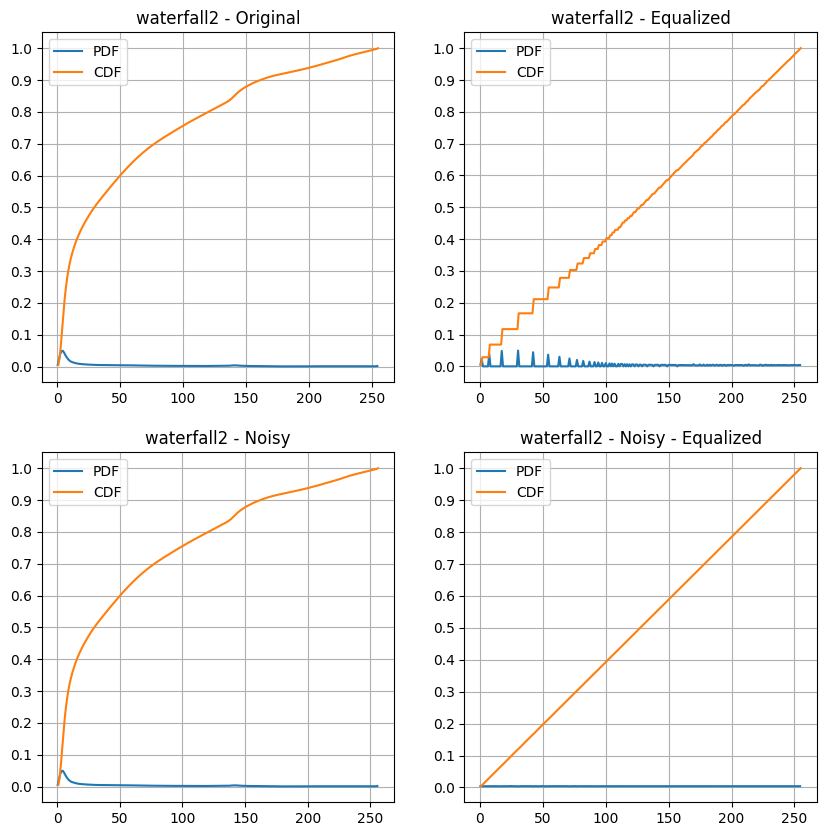

In [194]:
# Import image for evaluation
img_name = 'waterfall2'
img_path = f"./images/{img_name}.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Create noise layer and add to original image
noise  =  np.random.randint(0,99,size = (np.size(img,0), np.size(img,1)))/100
noisy_img = img + noise

# Plot results
plt.figure(figsize=(10,10))
plt.subplot(221)
img_equalizer(img).plot_pdf_cdf()
plt.title(f'{img_name} - Original')
plt.subplot(222)
img_equalizer(img_equalizer(img).equalized_img).plot_pdf_cdf()
plt.title(f'{img_name} - Equalized')
plt.subplot(223)
img_equalizer(noisy_img).plot_pdf_cdf()
plt.title(f'{img_name} - Noisy')
plt.subplot(224)
img_equalizer(img_equalizer(noisy_img).equalized_img).plot_pdf_cdf()
plt.title(f'{img_name} - Noisy - Equalized')
plt.show()


Observations:
1. The added noise did not significantly impact the shape of the unequalized PDF or CDF.
2. Noisy Equalized PDF is quite flat and the CDF is quite straight.

From this it seems that there was at least some truth to my initial assumtion that the smoothness of the CDF is linked to the coarsness of the 8-bit gray scale.

I can add that I could not see a reason why simply increasing the number of bins would be relevant in this case. The number of bins only affect the smoothness of the CDF-function we are interpolating onto. The interpolation function can find any point in between the bin points anyway, so that's why I did not explore that option.

Below I will print all 4 versions of the waterfall image for comarison.

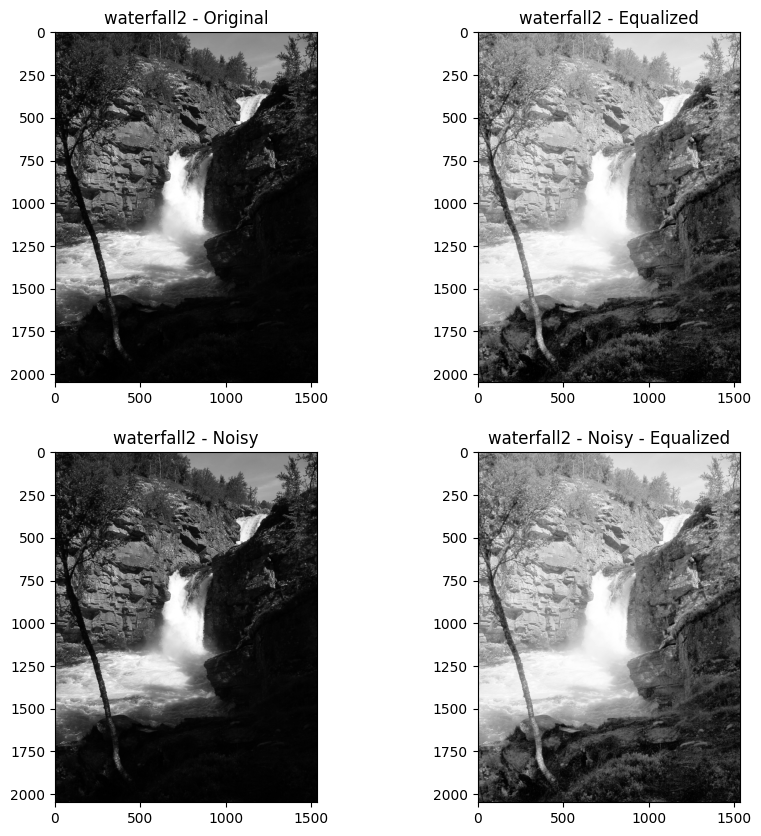

In [195]:
plt.figure(figsize=(10,10))
plt.subplot(221)
img_equalizer(img).plot_image()
plt.title(f'{img_name} - Original')
plt.subplot(222)
img_equalizer(img_equalizer(img).equalized_img).plot_image()
plt.title(f'{img_name} - Equalized')
plt.subplot(223)
img_equalizer(noisy_img).plot_image()
plt.title(f'{img_name} - Noisy')
plt.subplot(224)
img_equalizer(img_equalizer(noisy_img).equalized_img).plot_image()
plt.title(f'{img_name} - Noisy - Equalized')
plt.show()

Since the average added value to each pixel is approximately $0.5$, it is expected that the overall brightness of the Noisy image should be half a shade brighter than the original. By making the noise energy neutral (avg to 0), this could have been avoided. Overall I can't really say that I can see a difference between the top and bottom images.


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image we have:
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is the $k$-th image with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

$$
\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}
$$

Then it can be shown that
$$
\begin{equation}\
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}
$$
and
$$
\begin{equation}\
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}
$$

**a)** Show how to derive these two results using the first equation and the information given in the text.


Finding expression based on mean:
$$
\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y) = \frac{1}{K}\sum_{k = 1}^{K}f+\eta_{k}(x,y)
     = f+\overline{\eta_{k}(x,y)}
\end{equation}
$$

Assuming that the mean noise is zero, gives that $f$ is equal to the expected value of the mean of $g$:

$$
\begin{equation}\
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}
$$

Finding expression based on variance:
$$
\begin{equation}
\sigma^{2}_{\overline{g(x,y)}} =  var[\frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y)] 
    = \frac{1}{K^2}var[\sum_{k = 1}^{K}g_{k}(x,y)] = \frac{K}{K^2}\sigma^{2}_{{g(x,y)}}
\end{equation}
$$
Further we have that:
$$
\begin{equation}
\sigma^{2}_{{g(x,y)}} = var[f(x,y)+\eta(x,y)] = \sigma^{2}_{\eta(x,y)}
\end{equation}
$$
..since $f$ and $\eta$ are uncorrelated and that $\sigma^{2}_{f(x,y)}=0$

This leaves the final expression:

$$
\begin{equation}\
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}
\end{equation}
$$

## 
### Delivery (dead line) on CANVAS: 22.09.2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no


### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.